In [1]:
import sys  
sys.path.insert(0, '/home/dfki/Desktop/Thesis/hyperopt')
import temp
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import random
from hyperopt import fmin, tpe, hp, STATUS_OK,Trials,trials_from_docs
import seaborn as sns
import numpy as np
import pandas as pd


# influence of number of the point on TPE (time wise)

### - 10000 iteration of dataset3 

total time point finding is 29981.139815000002
mean time for each configuration finding 2.997814200079992


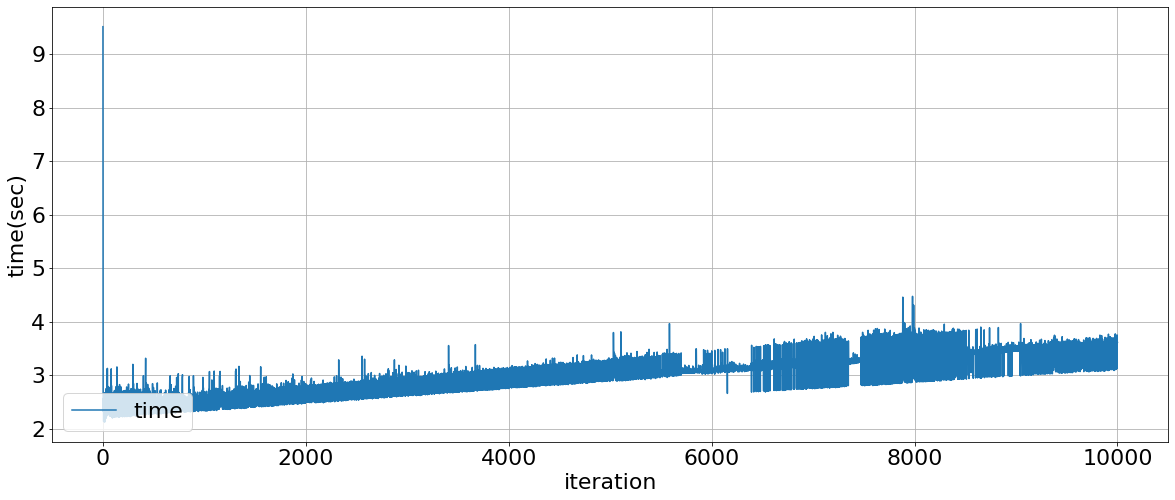

In [2]:
it1000_0in_timetracker_3 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/result_onserver_openmlspace/3/10000it_0in_timetracker_3.p", "rb"))
temp.time_tracker_plot(it1000_0in_timetracker_3, 'time', 'iteration', 'time(sec)', show_plot=True)

### Dataset overview - 100 iteration 

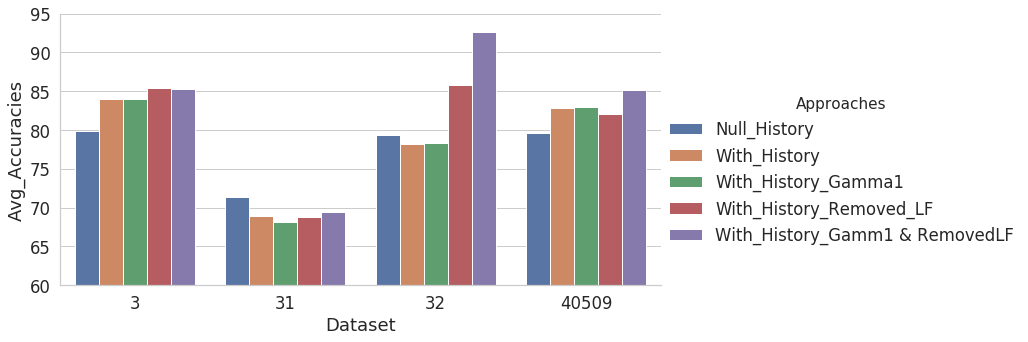

In [42]:
#in this section I need to show the bar chart which has 3 items
#1) null-history 2) with all history 3) with best amount of history

dataset_3 = 79.84
dataset_3_history = 83.99 #21249 history 
dataset_3_lf = 85.40
dataset_3_gamma1 = 83.99
dataset_3_gamma1_lf = 85.24 

dataset_31 = 71.37
dataset_31_history = 68.94 #8743 history 
dataset_31_lf =68.75
dataset_31_gamma1 = 68.22
dataset_31_gamma1_lf = 69.40


dataset_32 =79.36
dataset_32_history = 78.23 #10203 History
dataset_32_lf = 85.76
dataset_32_gamma1 = 78.28
dataset_32_gamma1_lf = 92.60 

dataset_125923 = 79.64 
dataset_125923_history = 82.88 #6803 Hsitory 
dataset_125923_lf = 82.07
dataset_125923_gamma1 = 82.96
dataset_125923_gamma1_lf = 85.13

dataframe = {'Dataset':[3,31,32,40509],
             'Null_History':[dataset_3,dataset_31,dataset_32,dataset_125923],
             'With_History':[dataset_3_history,dataset_31_history,dataset_32_history,dataset_125923_history],
             'With_History_Gamma1':[dataset_3_gamma1,dataset_31_gamma1,dataset_32_gamma1,dataset_125923_gamma1],
             'With_History_Removed_LF':[dataset_3_lf,dataset_31_lf,dataset_32_lf,dataset_125923_lf],
             'With_History_Gamm1 & RemovedLF':[dataset_3_gamma1_lf,dataset_31_gamma1_lf,dataset_32_gamma1_lf,dataset_125923_gamma1_lf]
            }

dataframe_1 = pd.DataFrame(dataframe)

dataframe_2 = pd.melt(dataframe_1, id_vars="Dataset", var_name="Approaches", value_name="Avg_Accuracies")
dataframe_2.head()

sns.set(font_scale=1.5,style='whitegrid')
# sns.set_context("talk",font_scale=1.4,rc={'figure.figsize':(11.7,15)} )

g= sns.catplot(x='Dataset', y='Avg_Accuracies', hue='Approaches', data=dataframe_2, kind='bar',aspect=2)
g.set(ylim=(60,95))

## Dataset 3

#### quality openml points

In [3]:
trial_3 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/3/trial_3.p", "rb"))


In [2]:
# all_trials = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/dima/3/10000it_0in_3.p", "rb"))
# trial_3 = temp.remove_zero_trial(all_trials)

Number of fail_point is 1227


In [4]:
len(trial_3.trials)

21249

In [13]:
np.array([79.84,83,85,86,88,88.38]).std()

2.945107053326847

Text(0.5, 1.0, 'Different approaches for 100 iteration try- Dataset 3')

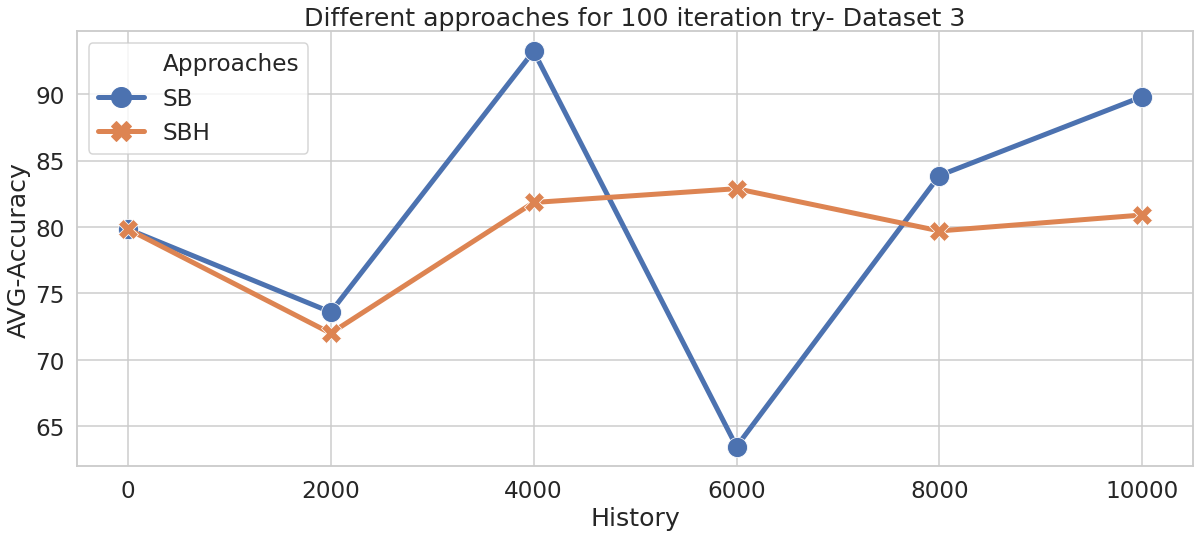

In [14]:
#100 iterations

x_axis = [0,2000,4000,6000,8000,10000]

avg_acc_our_3 = np.array([79.84,73.59,93.23,63.47,83.87,89.81])#
avg_acc_random_3 = np.array([79.84,83,85,86,88,88.38])
avg_acc_removedLF_random_3  =np.array([84.90,82.44,86.12,87.19,86.93,87.46])
avg_acc_removedLF_our_3 =np.array([84.86,73.78,89.10,74.80,82.14,87.65])
avg_acc_gamma1_our_3 = np.array([93.02,74.49,70.02,67.55,83.55,87.34])
avg_acc_gamma1_random_3 = np.array([93.02,83.87,83.69,85.90,87.25,87.92])

histogram = np.array([79.84,72,81.84,82.88,79.7,80.90])
histogram_1000run=np.array([87.65,78.01,82.42,85.73,82,84.16])
histogram_gamma1 = np.array([93.02,81.7,84.1,82.68,82.08,87.92])
histogram_lf = np.array([84.86,76.43,84.55,85.46,79.79,78.46])
histogram_gamma1_lf = np.array([92.64,86.23,86.31,86.97,88.68,86.41])
best_history= np.array([79.84,66.39,82.03,65.60,63.20,62.88])
worst_history=np.array([79.84,52.22,87.98,91.88,69.27,86.90])


# avg_acc_our_fromhyperopthistory = np.array([79.84,98.26,74.55,64.95,55.92]) #until 8000 history




d = {'History':x_axis,
    'SB':avg_acc_our_3, 
#     'SB_removedLF':avg_acc_removedLF_our_3, 
#     'SB_gamma1':avg_acc_gamma1_our_3,
     
#      'SB_hpinput':avg_acc_our_fromhyperopthistory,
     
#     'SBR':avg_acc_random_3, 
#     'SBR_removedLF':avg_acc_removedLF_random_3, 
#     'SBR_gamma1':avg_acc_gamma1_random_3,
     
     'SBH':histogram,
#      'SBH_gamma1':histogram_gamma1,
#      'SBH_removedLF':histogram_lf,
#      'SBH_removedLF_gamma1':histogram_gamma1_lf,
#      'SBH_1000run':histogram_1000run,
     
#      'SB_Best':best_history,
#      'SB_worst':worst_history
     
    }
pdnumsqr = pd.DataFrame(d)

sns.set(font_scale=1.4,style='whitegrid',)
sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})

sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pdnumsqr,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Different approaches for 100 iteration try- Dataset 3')

## Dataset 31

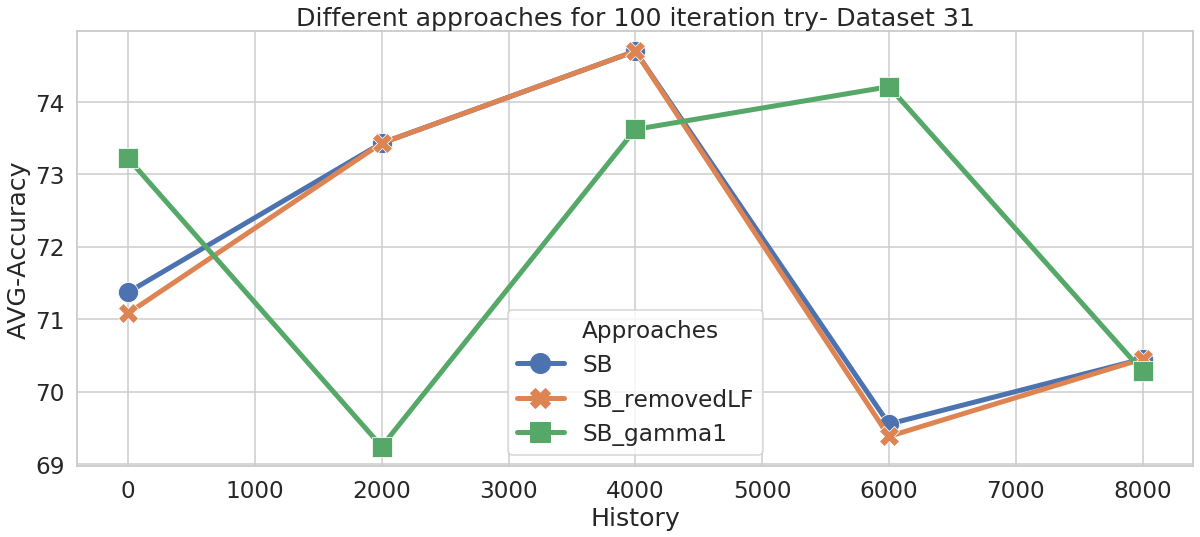

In [35]:
# avg accuracy for 100 iteration data set 31
x_axis_31 = [0,2000,4000,6000,8000]

avg_acc_our_31 = np.array([71.37,73.43,74.70,69.55,70.45])
avg_acc_removedLF_our_31 = np.array([71.08,73.43,74.70,69.38,70.45])
avg_acc_gamma1_our_31 = np.array([73.22,69.24,73.62,74.21,70.28])

avg_acc_gamma1_random_31 = np.array([73.22,70.22,69.23,69.08,70.39])
avg_acc_removedLF_random_31 = np.array([71.08,68.48,68.58,66.16,70.40])
# avg_acc_random_31  = np.array([71.37,])

histogram_31 = np.array([71.37,70.21,67.47,68.93,69.31])

d31 = {'History':x_axis_31,
    'SB':avg_acc_our_31, 
 
    'SB_removedLF':avg_acc_removedLF_our_31, 
    'SB_gamma1':avg_acc_gamma1_our_31,
#     'SBR_removedLF':avg_acc_removedLF_random_31,  
#     'SBR':avg_acc_random_31,
#     'SBR_gamma1':avg_acc_gamma1_random_31,
       
#      'SBH':histogram_31  
    }
pd31 = pd.DataFrame(d31)

sns.set(font_scale=1.4,style='whitegrid',)
sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})

g1=sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd31,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Different approaches for 100 iteration try- Dataset 31')


## Dataset 32

Text(0.5, 1.0, 'Different approaches for 100 iteration try- Dataset 32')

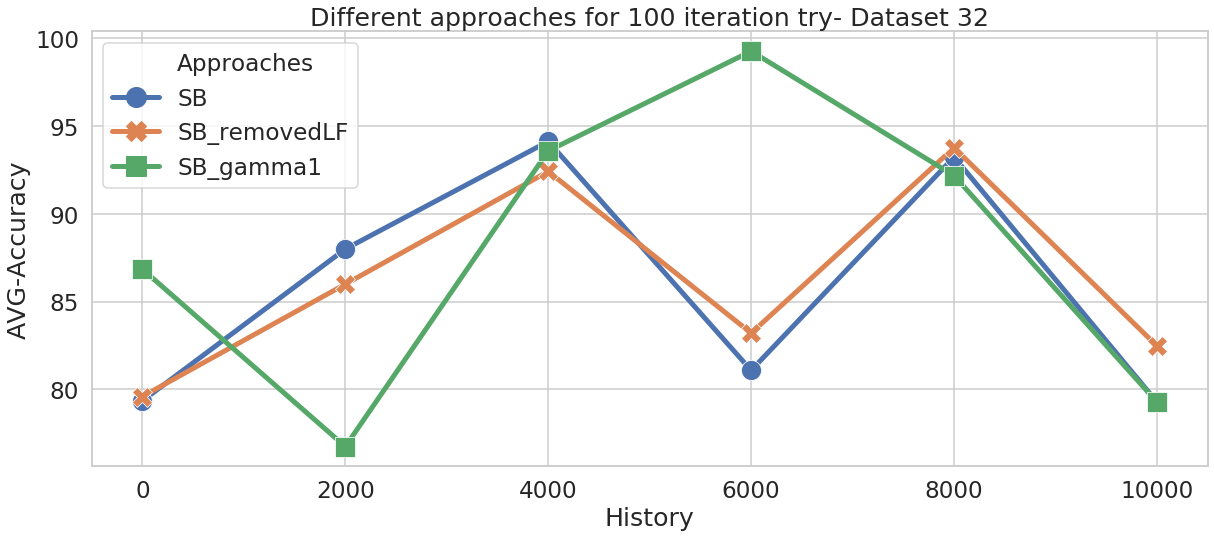

In [27]:
# avg accuracy for 100 iteration data set 32
x_axis_32 = [0,2000,4000,6000,8000,10000]

avg_acc_our_32 = np.array([79.36,88,94.13,81.09,93.24,79.28])
avg_acc_removedLF_our_32 = np.array([79.60,86,92.42,83.21,93.77,82.48])
avg_acc_gamma1_our_32 = np.array([86.85,76.75,93.59,99.27,92.18,79.28])



d32 = {'History':x_axis_32,
    'SB':avg_acc_our_32, 
#     'SBR':avg_acc_random_32, 
#     'SBR_removedLF':avg_acc_removedLF_random_32,  
    'SB_removedLF':avg_acc_removedLF_our_32, 
    'SB_gamma1':avg_acc_gamma1_our_32,
#     'SBR_gamma1':avg_acc_gamma1_random_32
    }
pd32 = pd.DataFrame(d32)

sns.set(font_scale=1.4,style='whitegrid',)
sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})

sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd32,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Different approaches for 100 iteration try- Dataset 32')

# Dataset 125923

Text(0.5, 1.0, 'Different approaches for 100 iteration try- Dataset 125923')

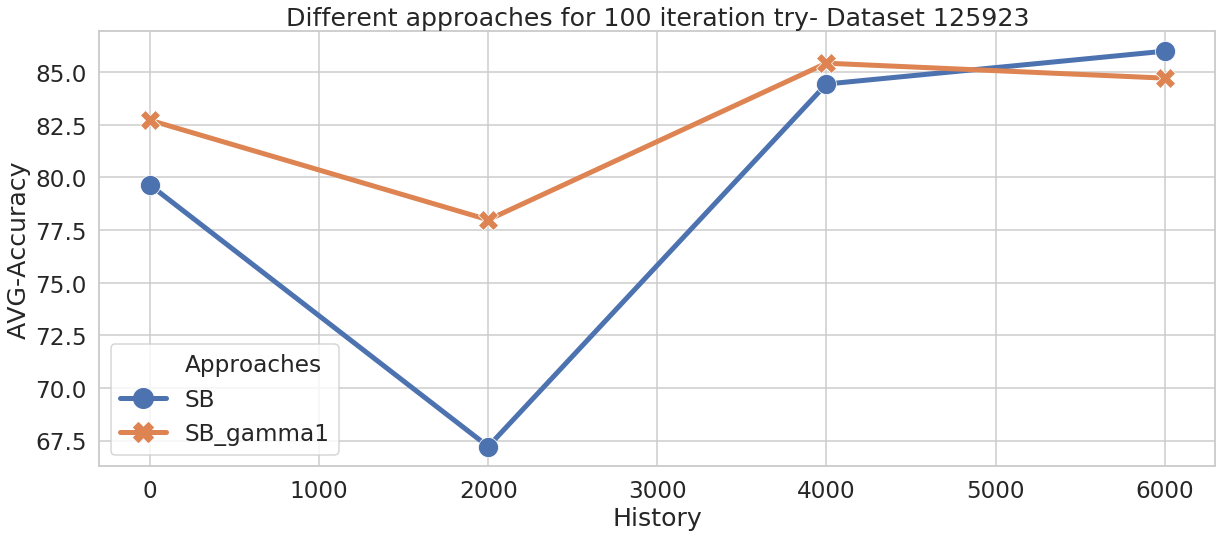

In [23]:
# avg accuracy for 100 iteration data set 32
x_axis_125923 = [0,2000,4000,6000]

avg_acc_our_125923 = np.array([79.64,67.22,84.44,86])
avg_acc_removedLF_our_125923 = np.array([])
avg_acc_gamma1_our_125923 = np.array([82.72,77.99,85.43,84.72])



d125923 = {'History':x_axis_125923,
    'SB':avg_acc_our_125923, 
#     'SBR':avg_acc_random_125923, 
#     'SBR_removedLF':avg_acc_removedLF_random_125923,  
#     'SB_removedLF':avg_acc_removedLF_our_125923, 
    'SB_gamma1':avg_acc_gamma1_our_125923,
#     'SBR_gamma1':avg_acc_gamma1_random_125923
    }
pd125923 = pd.DataFrame(d125923)

sns.set(font_scale=1.4,style='whitegrid',)
sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})

sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd125923,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Different approaches for 100 iteration try- Dataset 125923')

# Kmeans- select one item from heach cluster 

In [3]:

experiment = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/31/automatic/new/experiment_history1.p", "rb"))
len(experiment)

12

In [10]:
x_axis_kmeans=[]
avg_acc_3_kmeans=[]
std_3 =[]
max_found_3 =[]
history_quality=[]
for item in experiment:
    x_axis_kmeans.append(item[0])
    avg_acc_3_kmeans.append(item[1])
    std_3.append(item[2])
    max_found_3.append(item[3])
    history_quality.append(item[4])

d3kmeasn ={
    'History':x_axis_kmeans,
    'AVG-Accuracy':avg_acc_3_kmeans,
#     'std':std_3,
    'Best_found':max_found_3,
    'History_quality':history_quality
}

pd3kmeasn = pd.DataFrame(d3kmeasn)

sns.set(font_scale=1.4,style='whitegrid',)
sns.set_context("talk",font_scale=1.4, rc={"lines.linewidth": 5,'lines.markersize':20})


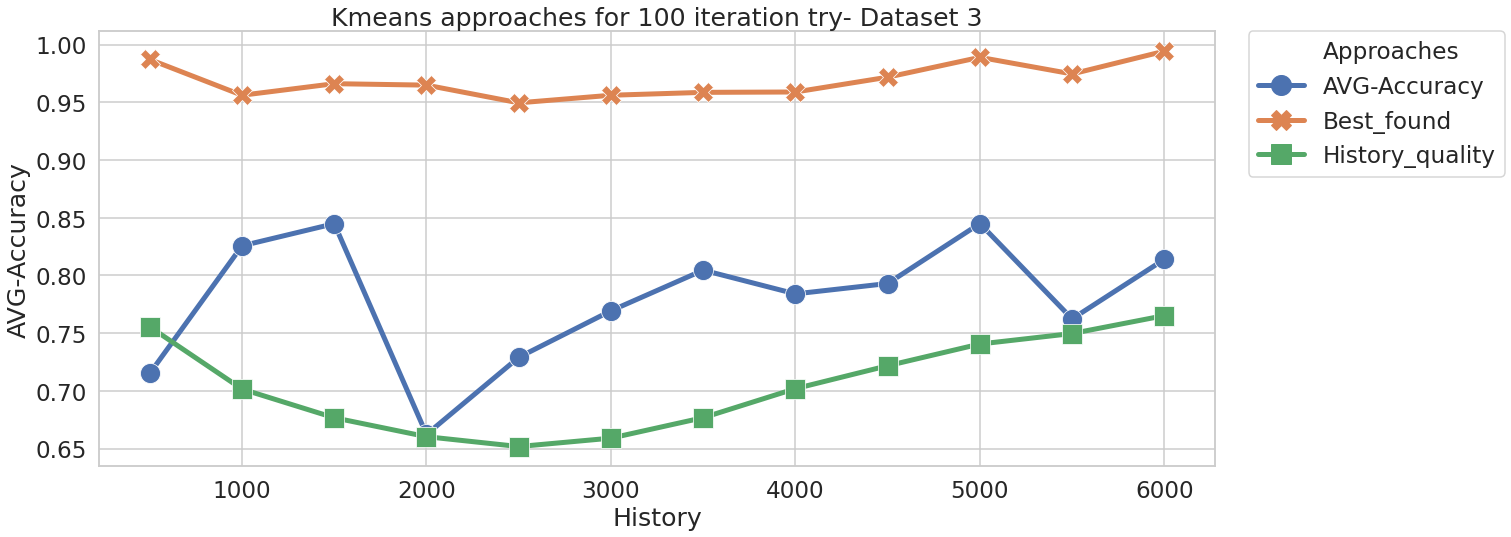

In [23]:

sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd3kmeasn,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Kmeans approaches for 100 iteration try- Dataset 3')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)

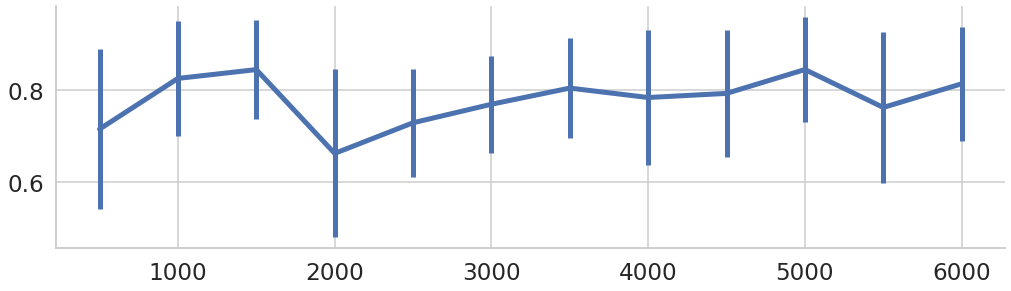

In [8]:

g = sns.FacetGrid(pd3kmeasn,height=5,aspect=3)

ax = g.map(plt.errorbar, "History", "AVG-Accuracy", "std")

ax.set(xlabel="", ylabel="")


# dataset 31

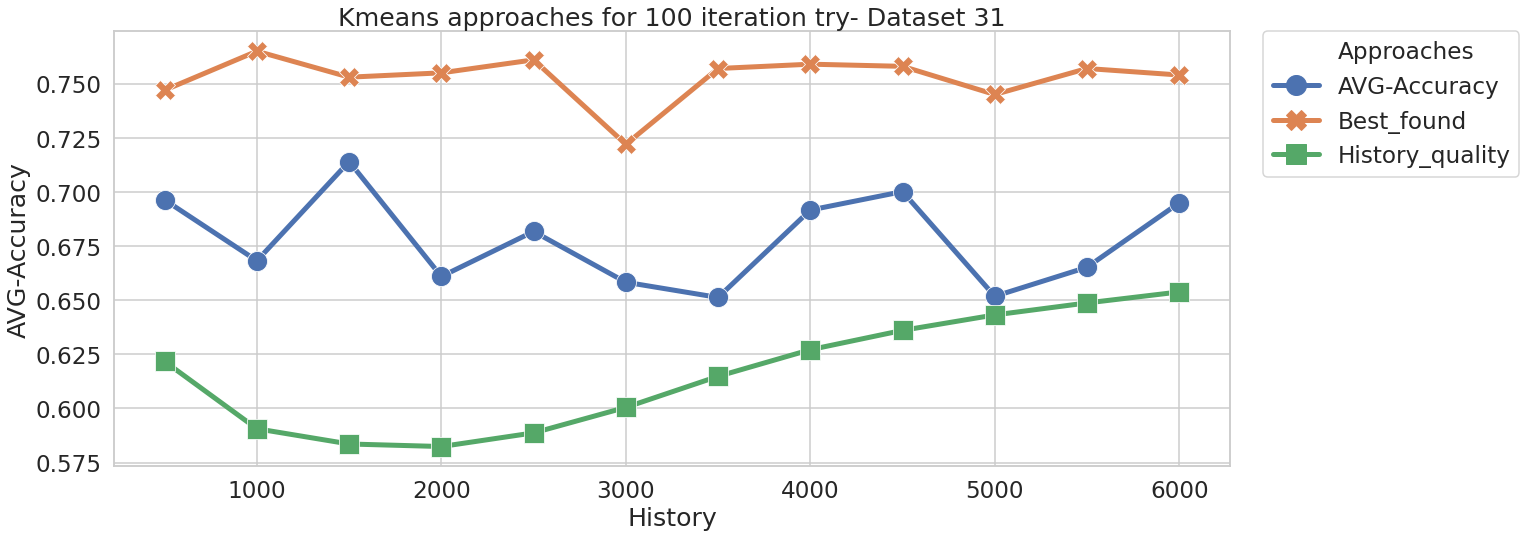

In [11]:
sns.lineplot(x='History', y='AVG-Accuracy',style='Approaches',markers=True,dashes=False,hue='Approaches',data=pd.melt(pd3kmeasn,['History'],value_name ='AVG-Accuracy',var_name='Approaches')).set_title('Kmeans approaches for 100 iteration try- Dataset 31')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.)

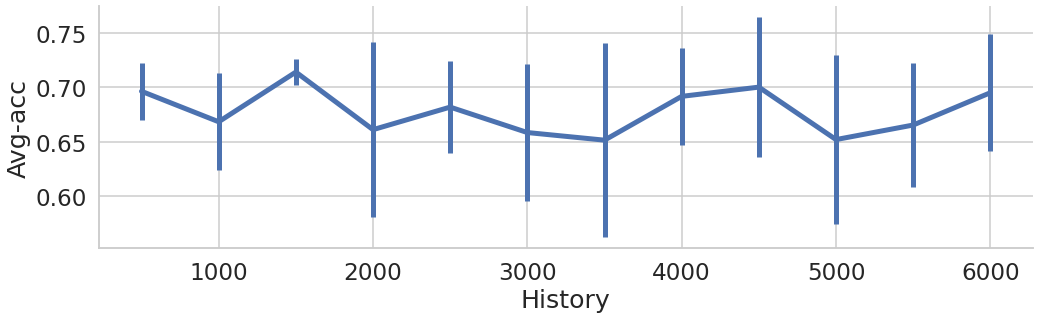

In [9]:
g = sns.FacetGrid(pd3kmeasn,height=5,aspect=3)

ax = g.map(plt.errorbar, "History", "AVG-Accuracy", "std")

ax.set(xlabel="History", ylabel="Avg-acc")

In [18]:
from hyperopt import hp
from hyperopt import hp, fmin, rand, tpe, space_eval,Trials,STATUS_OK,anneal
import numpy as np
import hyperopt

def objective(args):
    x= args
    print("X is {} and loss is {}".format(x,x[0] ** 2))
    return {'loss': x[0] ** 2, 'status': STATUS_OK }


space  = [hp.uniform('x',-10,10)]
# trial = Trials()
init_vals = [{'x':10},{'x':8.5},{'x':9},{'x':-9},{'x':8},{'x':-8},{'x':7},{'x':-7},{'x':6},{'x':-6},{'x':5},{'x':-5},{'x':4},{'x':-4}
             ,{'x':7.5},{'x':6.5},{'x':5.5},{'x':8.25},{'x':8.5},{'x':7.25},{'x':6.25},{'x':5.5},{'x':5.455},{'x':6.25},{'x':4.16},
            {'x':7.15},{'x':8.225},{'x':7.0445},{'x':5.555},{'x':6.33},{'x':4.26},{'x':4.78},{'x':8.6},{'x':8.9}]


init_vals2 = [{'x':9}]




print(len(init_vals2))


trial = generate_trials_to_calculate(init_vals2)


best,trials_new = fmin(objective,
    space=space,
    algo=tpe.suggest,
    max_evals=87,
    trials=trial,
    rstate=np.random.RandomState(10))


# print(trial.trials)

1
X is (9.0,) and loss is 81.0                        
X is (-8.151467151080013,) and loss is 66.4464167151365
X is (-9.02965739840653,) and loss is 81.53471273259777         
X is (9.829832933802926,) and loss is 96.62561550647665                     
X is (4.4179386958144935,) and loss is 19.518182319975068                   
X is (7.242148597563364,) and loss is 52.448716309189                       
X is (9.967011260376356,) and loss is 99.34131346446908                       
X is (7.138936416841798,) and loss is 50.964413163710006                      
X is (-3.6373247795421744,) and loss is 13.230131551871528                    
X is (-2.6391720846767157,) and loss is 6.965229292536842                     
X is (-0.2219772194182994,) and loss is 0.049273885940679836                  
X is (6.184750947239035,) and loss is 38.25114427937414                       
X is (6.509331125702296,) and loss is 42.371391704036725                         
X is (-4.456709166978287,) and loss i

In [ ]:
trial  = [{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 66.4464167151365, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [-8.151467151080013]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 432000), 'refresh_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 443000)}, {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 81.53471273259777, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [-9.02965739840653]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 445000), 'refresh_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 453000)}, {'state': 2, 'tid': 2, 'spec': None, 'result': {'loss': 96.62561550647665, 'status': 'ok'}, 'misc': {'tid': 2, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [2]}, 'vals': {'x': [9.829832933802926]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 455000), 'refresh_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 465000)}, {'state': 2, 'tid': 3, 'spec': None, 'result': {'loss': 19.518182319975068, 'status': 'ok'}, 'misc': {'tid': 3, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [3]}, 'vals': {'x': [4.4179386958144935]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 467000), 'refresh_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 473000)}, {'state': 2, 'tid': 4, 'spec': None, 'result': {'loss': 52.448716309189, 'status': 'ok'}, 'misc': {'tid': 4, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [4]}, 'vals': {'x': [7.242148597563364]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 475000), 'refresh_time': datetime.datetime(2020, 2, 27, 9, 34, 43, 479000)}]

100%|██████████| 30/30 [00:00<00:00, 332.21it/s, best loss: 0.008925701991407952]


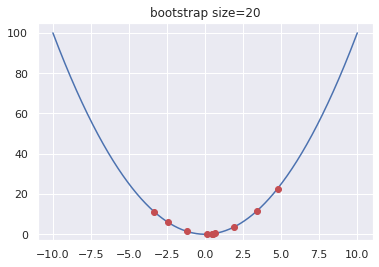

In [19]:
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.fmin import generate_trials_to_calculate
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
LOW, HIGH = -10, 10


def objective(x):
    return {
        'loss': x ** 2,
        'status': STATUS_OK,
        }


def bootstrap(init_size, plot_bootstrap_points=False):
    trials = Trials()
    if init_size > 0:
        # as initial values pick points uniformly on the x-axis; we need this as a dict
        init_vals = [{'x': i} for i in np.linspace(LOW, HIGH, init_size)]

        # this generates a trial object that can be used to bootstrap computation for the optimizer
        trials = generate_trials_to_calculate(init_vals)

    # since we've a bootstrapped trials object, the number of function evals would be init_size + max_evals
    best = fmin(objective,
                space=hp.uniform('x', LOW, HIGH),
                algo=tpe.suggest,
                max_evals=10,
                trials=trials,
               rstate=np.random.RandomState(10))
#     print ("Best x: %0.04f" % (best))

    # get the bootstrap data for plotting
    bootstrap_points = [t['misc']['vals']['x'][0] for t in trials][:init_size]
    bootstrap_losses = trials.losses()[:init_size]
    bootstrap_plot_data = np.asarray(sorted(zip(bootstrap_points, bootstrap_losses)))

    # get data reg points not belonging to the bootstrap
    tpe_suggest_points = [t['misc']['vals']['x'][0] for t in trials][init_size:]
    tpe_suggest_losses = trials.losses()[init_size:]
    tpe_suggest_plot_data = np.asarray(sorted(zip(tpe_suggest_points, tpe_suggest_losses)))

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # plot the objective fn
    temp = np.linspace(LOW, HIGH, 1000)
    ax.plot(temp, [objective(x)['loss'] for x in temp])

    # plot the bootstrap values
    if plot_bootstrap_points and init_size > 0:
        ax.plot(bootstrap_plot_data[:, 0], bootstrap_plot_data[:, 1], marker='o', ls='', color='gray' )

    # plot the new trial values
    ax.plot(tpe_suggest_plot_data[:, 0], tpe_suggest_plot_data[:, 1], 'ro')

    # extend the y axis so that nothing gets cut off
    ax.set_ylim(bottom=-3)
    ax.set_title('bootstrap size=%d' % (init_size,))
    plt.show()


if __name__ == "__main__":
    bootstrap(20, False)